In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from Captcha_Reader import getWords
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import os

In [5]:
target = []
flat_data = []
DataDirectory = './DataSet/'

Categories = os.listdir(DataDirectory)

for index, i in enumerate(Categories):
    print(i, '-> ', str(round(100*(index + 1)/len(Categories))) + '%')
    target_class = index
    path = os.path.join(DataDirectory,i)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
#         img_resized = img_array[:210, 30:-1, :]
        img_resized = resize(img_array,(40,40,3))
        flat_data.append(img_resized.flatten())
        target.append(target_class)

flat_data = np.array(flat_data)
target = np.array(target)

e ->  2%
q ->  4%
W ->  6%
3 ->  8%
H ->  9%
Z ->  11%
G ->  13%
Y ->  15%
g ->  17%
d ->  19%
f ->  21%
k ->  23%
7 ->  25%
5 ->  26%
c ->  28%
9 ->  30%
x ->  32%
m ->  34%
R ->  36%
y ->  38%
D ->  40%
S ->  42%
Q ->  43%
r ->  45%
b ->  47%
2 ->  49%
C ->  51%
v ->  53%
U ->  55%
p ->  57%
6 ->  58%
B ->  60%
M ->  62%
E ->  64%
T ->  66%
1 ->  68%
t ->  70%
V ->  72%
X ->  74%
u ->  75%
F ->  77%
N ->  79%
K ->  81%
n ->  83%
4 ->  85%
z ->  87%
A ->  89%
h ->  91%
a ->  92%
P ->  94%
8 ->  96%
s ->  98%
w ->  100%


In [6]:
df = pd.DataFrame(flat_data)
df['Target'] = target

In [7]:
x = df.iloc[:,:-1].values
y = target

print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True, test_size = 0.2, random_state = 109, stratify = y)

print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (5381, 4800)
Output data dimensions: (5381,)
Dimensions of input training data: (4304, 4800)
Dimensions of input testing data: (1077, 4800)
Dimensions of output training data: (4304,)
Dimensions of output testing data: (1077,)


In [8]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x_train, y_train)

SVC()

In [9]:
y_predict = rbf_svc.predict(x_test)
print(y_test)
print(y_predict)

[26  6 32 ...  7 42 28]
[26  6 32 ...  7 11 28]


In [10]:
ac = accuracy_score(y_test,y_predict)
print(ac)

0.8820798514391829


In [5]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(x_test)
print(y_test)
print(y_pred)
ac = accuracy_score(y_test,y_pred)
print(ac)

In [11]:
def getCaptchaText(Captcha):
    plt.imshow(plt.imread(Captcha))
    plt.show()
    clusters = getWords(Captcha)
    text = ''
    for image in clusters:
        flat_data = []
        img_resized = resize(image,(40,40,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        plt.imshow(img_resized)
        plt.show()
        y_output = rbf_svc.predict(flat_data)

        text += Categories[y_output[0]].replace('upper', '').replace('lower', '')
    return text

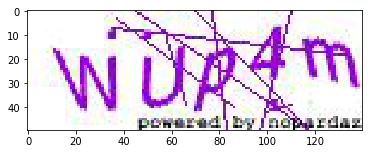

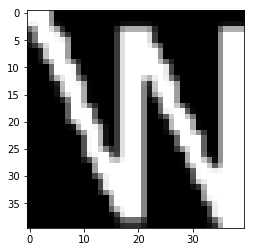

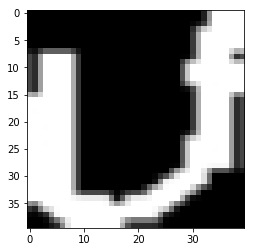

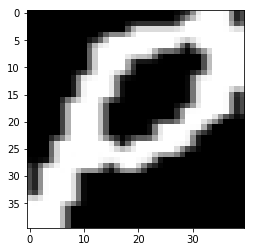

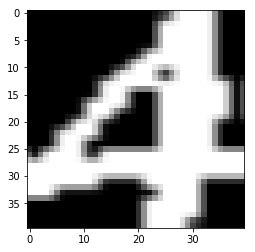

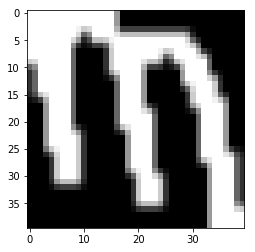

Predicted Text Is: WUP4m


In [13]:
Captcha = './Golestan-Captchas/15305.gif'
text = getCaptchaText(Captcha)
print("Predicted Text Is:", text)